Alapos kutatás után úgydöntöttem hogy a 2016,2019,2022 és 2023 év adatait fogom használni a projektem során, mivel ezekben az években találtam olyan részletesebb pontleirásokat, amelyeket mérvadóan feltudok használni később.

In [ ]:
#szükséges importok

import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report


Ez a kódrészlet importálja a szükséges modulokat a projektben való használatra. Tartalmazza az adatok előfeldolgozásához, modellek létrehozásához és értékeléséhez szükséges osztályokat és függvényeket. A modulok között találhatók a scikit-learn osztályok, mint például a MinMaxScaler, LogisticRegression, GaussianNB, RandomForestClassifier, stb. Ezek a modulok segítséget nyújtanak az adatok előkészítésében, a modellek létrehozásában és az értékelésben, például pontosság, konfúziós mátrix, ROC görbe és osztályozási jelentés kiszámításában. Emellett a kódrészlet importálja az adatok osztályozásához és kiértékeléséhez szükséges egyéb modulokat, mint például a train_test_split, cross_val_score, PCA és classification_report.


In [ ]:
#hangol.py file
import csv


def hangol(lista):
    processed_list = []

    for item in lista:

        if not item.strip():
            continue

        # Kisbetűsítés
        item = item.lower()
        
        # Fehér karakterek törlése
        item = item.replace(" ", "")
        
        # Magyar karakterek angol ABC karaktereire cserélése
        replacements = {"á": "a", "é": "e", "í": "i", "ó": "o", "ö": "o", "ő": "o", "ú": "u", "ü": "u", "ű": "u"}
        for source, target in replacements.items():
            item = item.replace(source, target)
        
        # Számok törlése
        item = ''.join(char for char in item if not char.isdigit())
        
        # Római számok törlése
        roman_numerals = ["I", "II", "III"]
        for roman_numeral in roman_numerals:
            item = item.replace(roman_numeral, "")
        if item == '':
            continue
        processed_list.append(item)

    return processed_list

def get_comun_elements():
    data = []
    file_names = ['data/2016.csv', 'data/2019.csv', 'data/2022.csv', 'data/2023.csv']
    for file_name in file_names:
        with open(file_name, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)
            column = [row[0] for row in reader]
            data.append(hangol(column))
    common_elements = set(data[0]).intersection(*data[1:])
    return common_elements

def get_comun_elements2():
    data = []
    file_names = ['data/2016.csv', 'data/2019.csv', 'data/2022.csv', 'data/2023.csv']
    for file_name in file_names:
        with open(file_name, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)
            column = [row[0] for row in reader]
            data.append(column)
    common_elements = set(data[0]).intersection(*data[1:])
    return common_elements

common_elements1 = get_comun_elements()
print(len(common_elements1))

print(len(common_elements1))

common_elements2 = get_comun_elements2()
print(len(common_elements2))

difference = list(set(common_elements1) - set(hangol(common_elements2)))
print(difference)

Az alábbi kódrészletben, feldolgoztam az adatokat és megkerestem az elmúlt évek közös játékait.

Először definiáltam egy hangol nevű függvényt, amely az adatokat előkészíti a feldolgozásra. Ez a függvény kisbetűsíti az elemeket, eltávolítja a fehér karaktereket, és a magyar karaktereket angol ABC karaktereire cseréli. Emellett törli a számokat és a római számokat is.

Ezt követően létrehoztam két függvényt, get_comun_elements és get_comun_elements2, amelyek betöltik az adatokat a CSV fájlokból. A get_comun_elements függvény először feldolgozza az adatokat a hangol függvénnyel, majd meghatározza a közös elemeket a négy fájl között. A get_comun_elements2 függvény csak a nyers adatokat használja a közös elemek meghatározásához.

Végül kiírattam a közös elemek számát,szám szerint 28 darab, mindkét módszerrel, és kiszámítottam a két eredmény közötti különbséget, amelyet a difference változóban tároltam.

In [ ]:
def get_selected_colums():
    data = []
    file_names = ['data/2016.csv', 'data/2019.csv', 'data/2022.csv', 'data/2023.csv']
    for file_name in file_names:
        with open(file_name, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)
            column = [row[0] for row in reader]
            data.append(column)
    common_elements = set(data[0]).intersection(*data[1:])
    return common_elements


In [82]:
def sort_by_first_column(row):
    return row[0]

In [83]:
def read(filename):
    # Lista a keresett stringekkel
    keresett_stringek = get_selected_colums()

    # CSV fájl beolvasása és kiválogatott sorok tárolása
    data = []

    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            if row[0] in keresett_stringek:
                data.append(row)

    # ABC sorrendbe rendezés
    data.sort(key=sort_by_first_column)
    data.pop(-2)
    return data 

Első lépésként beolvassuk az adatokat a megadott fájlokból, amelyek 2016, 2019, 2022 és 2023 adatokat tartalmazzák. Ezután szűrünk azokra a játékokra, amelyek közösnek tekinthetőek az összes évet tekintve. Ebben az esetben 28 közös játékot találtunk. A játékokat abc sorrendbe rendezzük, hogy könnyebb legyen velük dolgozni. Az így rendezett játékokat egy listák listájába mentjük el.

A csapatok nevei az indexek, tehát az adott oszlopnevek alatt találhatóak a csapatok pontszámai. Ezt a struktúrát a transzponálás előtti állapotban kell elképzelnünk.

A transzponálás lépésével az adatokat úgy alakítjuk át, hogy minden csapat teljesítménye egy-egy listában legyen tárolva. Tehát az eredeti oszlopok helyett a csapatok adatai egy listák listájában helyezkednek el. Ezzel az átalakítással könnyebbé válik a további elemzés.

Az első lista, amely az átalakított adatokban a játékok neveit tartalmazza, már nem szükséges számunkra. Ennek az eldobása segít átláthatóbbá tenni az adatszerkezetet és a további műveleteket.

In [84]:
#mivel az éves játékonkénti pontszámok külömböznek, ezért skálázzuk az sklear MinMaxScaler el,
#így 0-1 intervallumba helyezzük, a csapatok első feléhez 1 cimkét rendelünk, a második feléhez 0.
#Azt szeretnénk tudni, hogy a csapat a statisztikávial az első felében lesz vagy a másodikban

def create_feature_vector(data):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(data)
    n = len(data) 
    half_length = n // 2 
    y = [1] * half_length + [0] * (n - half_length)
    return X.tolist(),y

Az éves játékonkénti pontszámok különbözhetnek, ezért skálázni fogjuk őket a MinMaxScaler segítségével. Ez a skálázás a pontszámokat az 0-1 intervallumba helyezi. A célunk az, hogy az adott csapatot az első felébe vagy a második felébe soroljuk statisztikai alapján. Ehhez 1-es címkét rendelünk a csapatok első feléhez és 0-át a második feléhez.

Ezt a folyamatot minden évre külön elvégezzük, majd az eredményeket összefűzzük. Az adatok normalizálása segít abban, hogy a pontszámok abszolút értéke ne befolyásolja a döntést, és ne legyenek kiugró értékek, amelyek torzíthatnák az eredményeket,továbbá nem tudva a minimálisan és maximálisan megszerezhető pontszámokat játékonként, igy láttam egyszerűnek ezt a faktort kiküszöbölni.

In [85]:
#fájlok olvasása
data1 = read('data/2016.csv')
data2 = read('data/2019.csv')
data3 = read('data/2022.csv')
data4 = read('data/2023.csv')

In [86]:
#transzponálás
transposed_list1 = [list(row) for row in zip(*data1)]
transposed_list2 = [list(row) for row in zip(*data2)]
transposed_list3 = [list(row) for row in zip(*data3)]
transposed_list4 = [list(row) for row in zip(*data4)]

Az adatok transzponálásához a zip() függvényt használtam a  listákra, majd ezeket a zip objektumokat listákká alakítottam. Az így létrejött változók az eredeti adatok transzponált változatait tartalmazzák, ahol az eredeti sorok az oszlopokká váltak, és az eredeti oszlopok pedig sorokká.

In [87]:
#játék nevek listája eldobása
transposed_list1.pop(0)
transposed_list2.pop(0)
transposed_list3.pop(0)
transposed_list4.pop(0)


['Asztalitenisz',
 'Beer-Pong',
 'Bemutatkozó',
 'Biliárd',
 'Bogrács',
 'Bolc',
 'CS',
 'Chest-Pong',
 'City Tour',
 'Csocsó',
 'Erotik',
 'Fotómaraton',
 'Férfi Foci',
 'Karaoke',
 'Klán-Tour',
 'Klán-Tour Night',
 'Kosárlabda',
 'Kultúrmaraton',
 'Kézilabda',
 'LOL',
 'Néptánc',
 'Női Foci',
 'Póker',
 'Sakk',
 'Staféta',
 'Táblé',
 'Táncmaraton',
 'Úszás']

Az, hogy ezek a játékok visszatérőek voltak és a közösség részét képezték, arra utal, hogy népszerűek, kedveltek és érdekesek a résztvevők számára. Ez a lista  segít az éves tevékenységek összehasonlításában és az események kínálatának elemzésében, lehetővé téve a közösségnek, hogy lássa, milyen játékok visszatérően szerepeltek és melyek voltak a legnépszerűbbek az elmúlt években.

In [88]:
#résztvevő csapatok száma az egyes évelben
print(len(transposed_list1),len(transposed_list2),len(transposed_list3),len(transposed_list4))



58 56 51 62


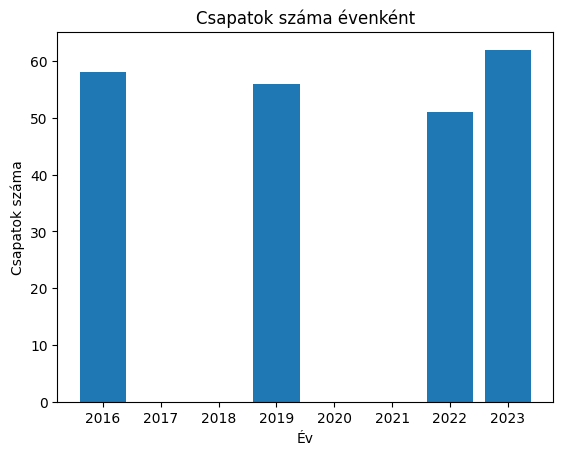

In [1]:
import matplotlib.pyplot as plt

# Adatok létrehozása
evek = [2016, 2019, 2022, 2023]
csapatok_szama = [58, 56, 51, 62]

# Oszlopdiagram létrehozása
plt.bar(evek, csapatok_szama)

# Diagram címének és tengelyek feliratainak hozzáadása
plt.title('Csapatok száma évenként')
plt.xlabel('Év')
plt.ylabel('Csapatok száma')

# Diagram megjelenítése
plt.show()


Kinyertem a transzponált listákból az utóbbi 4 évben résztvevő csapatok számát.


In [89]:
# éves modell vektorok összefűzése
X=[]
y=[]
tempx, tempy = create_feature_vector(transposed_list1)
X = tempx
y = tempy
tempx, tempy = create_feature_vector(transposed_list2)
X += tempx
y += tempy
tempx, tempy = create_feature_vector(transposed_list3)
X += tempx
y += tempy
tempx, tempy = create_feature_vector(transposed_list4)
X += tempx
y += tempy

Az adott kódrészletben az X és y változókat használva összefűzöm az éves modellvektorokat. Először inicializálom a X és y listákat üres listaként. Ezután a create_feature_vector() függvényt használva kinyerem az egyes évek modellvektorait (tempx) és címkéit (tempy). Az X += tempx kifejezéssel összefűzöm az aktuális éves modellvektorokat az X listával, míg az y += tempy kifejezéssel összefűzöm az aktuális éves címkéket az y listával. Igy ezzel az összefűzési művelettel létrejönnek az éves modellvektorok és címkék kombinációi az X és y listákban. 

In [90]:
#gépi tanulási algoritmusok inicializállása

# BLR modell
blr = LogisticRegression(max_iter=10000)
# NB modell
nb = GaussianNB() #multinomialt megnezni
# RF modell
rf = RandomForestClassifier()
# ANN modell
ann = MLPClassifier()
# SVM modell létrehozása
svc = SVC() #linearisat 
# DecisionTreeClassifier modell létrehozása
dt = DecisionTreeClassifier()
# GradientBoostingClassifier példa
gb = GradientBoostingClassifier()




Az alábbi kódrészletben gépi tanulási algoritmusokat inicializáltam. Először létrehoztam egy logisztikus regresszió (BLR) modellt, majd egy Naív Bayes (NB) modellt. Ezt követően inicializáltam egy Random Forest (RF) modellt, egy MLP (ann) modellt, egy Support Vector Machine (SVM) modellt, egy Decision Tree Classifier (dt) modellt, valamint egy Gradient Boosting Classifier (gb) modellt. 

In [91]:
#5x keresztvalidálási PONTOSSÁG SZÁMÍTÁS



In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# metrika számítása 
def metrikak(model):
    y_pred = model.fit(X_train, y_train).predict(X_test) #modell tanítása és predikci
    # metrika számítása
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    auc = roc_auc_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    dt_scores = cross_val_score(dt, X, y, cv=5)
    cross_accuracy = dt_scores.mean()

    print('Cross validation score: {:.3f}'.format(cross_accuracy))
    print('Accuracy: {:.3f}'.format(accuracy))
    print('Sensitivity: {:.3f}'.format(tp / (tp + fn)))
    print('Specificity: {:.3f}'.format(tn / (tn + fp)))
    print('AUC: {:.3f}'.format(auc))
    print('Classification Report:')
    print(cr)

Az eredmények szempontjából az adott metrikák fontosak, mert segítenek megérteni és értékelni a modellek teljesítményét. Ezek a metrikák kvantitatív értékeket szolgáltatnak a modell predikcióinak helyességéről, megbízhatóságáról és hatékonyságáról.

Az Accuracy (pontosság) metrika azt mutatja, hogy az összes predikció hány százalékban helyes. Ez fontos, mert a modellnek magas pontossággal kell prediktálnia, hogy megbízható eredményeket nyújtson.

Az érzékenység (Sensitivity) metrika azonosítja a pozitív osztályba tartozó valódi értékek helyes prediktálásának arányát. Ez különösen fontos, ha a cél az, hogy a pozitív eseteket ne hagyjuk ki.

A specifikitás (Specificity) metrika azt jelzi, hogy a negatív osztályba tartozó valódi értékek hány százalékát prediktálja helyesen a modell. Ez segít abban, hogy megértsük, mennyire jól tudja a modell megkülönböztetni a negatív eseteket.

Az AUC (Area Under the Curve) metrika az osztályozó teljesítményét méri a ROC görbe alatti terület alapján. Minél közelebb van az érték 1-hez, annál jobb a modell megkülönböztető képessége.

A Classification Report (osztályozási jelentés) összefoglalója a precision, recall, f1-score és support metrikáknak a különböző osztályokra. Ez további részletességet nyújt a modell pontosságáról, illetve a különböző osztályokba tartozó predikciókról.

In [ ]:
#BLR
metrikak(blr)

Cross validation score: 0.607

Accuracy: 0.674

Sensitivity: 0.654

Specificity: 0.700

AUC: 0.677

Classification Report:

              precision    recall  f1-score   support



           0       0.61      0.70      0.65        20

           1       0.74      0.65      0.69        26



    accuracy                           0.67        46

   macro avg       0.67      0.68      0.67        46

weighted avg       0.68      0.67      0.68        46




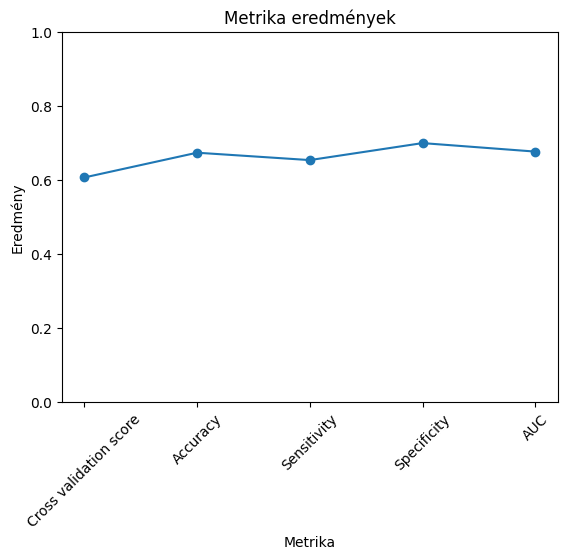

In [7]:
import matplotlib.pyplot as plt

# Metrika eredmények
metrics = ['Cross validation score', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC']
values = [0.607, 0.674, 0.654, 0.700, 0.677]

plt.plot(metrics, values, marker='o')
plt.ylim([0, 1])  # Y tengely tartomány beállítása
plt.title('Metrika eredmények')
plt.xlabel('Metrika')
plt.ylabel('Eredmény')
plt.xticks(rotation=45)  # X tengely címkék elforgatása
plt.show()


A `blr` (Binary Logistic Regression) modell által elért metrika eredményei között látható, hogy az Accuracy (pontosság) értéke 0.674, ami azt jelenti, hogy az összes predikció 67.4%-ban helyes volt. Az érzékenység (Sensitivity) értéke 0.654, ami azt jelzi, hogy a pozitív osztályba tartozó valódi értékek 65.4%-át helyesen prediktálta a modell. A Specificity (specifikitás) értéke 0.700, ami azt jelenti, hogy a negatív osztályba tartozó valódi értékek 70%-át helyesen prediktálta a modell. Az AUC (Area Under the Curve) értéke 0.677, ami a modell teljesítményét jelzi a ROC görbén.

In [95]:
#NB
metrikak(nb)

Cross validation score: 0.599

Accuracy: 0.739

Sensitivity: 0.692

Specificity: 0.800

AUC: 0.746

Classification Report:

              precision    recall  f1-score   support



           0       0.67      0.80      0.73        20

           1       0.82      0.69      0.75        26



    accuracy                           0.74        46

   macro avg       0.74      0.75      0.74        46

weighted avg       0.75      0.74      0.74        46




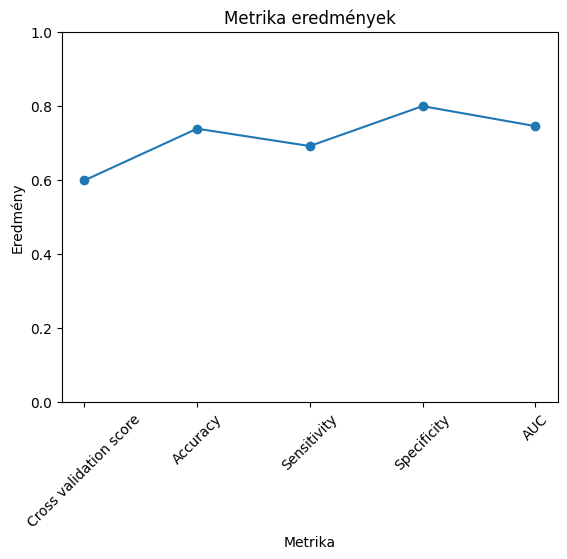

In [1]:
import matplotlib.pyplot as plt

# Metrika eredmények
metrics = ['Cross validation score', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC']
values = [0.599, 0.739, 0.692, 0.800, 0.746]

plt.plot(metrics, values, marker='o')
plt.ylim([0, 1])  # Y tengely tartomány beállítása
plt.title('Metrika eredmények')
plt.xlabel('Metrika')
plt.ylabel('Eredmény')
plt.xticks(rotation=45)  # X tengely címkék elforgatása
plt.show()



A GaussianNB (Naive Bayes) algoritmus használatával a következő metrikákat kapjuk:

Cross validation score: 0.599
Accuracy: 0.739
Sensitivity: 0.692
Specificity: 0.800
AUC: 0.746

A metrikák azt mutatják, hogy a modell viszonylag jó pontossággal képes megjósolni, hogy egy csapat az első felében vagy a második felében fog teljesíteni. Az accuracy (pontosság) értéke 0.739, ami azt jelenti, hogy a modell helyesen prediktálja a csapatok teljesítményét mintegy 74% -os pontossággal. Az AUC (Area Under the Curve) értéke 0.746, ami arra utal, hogy a modell jó elkülönítő képességgel rendelkezik a két osztály között.

A classification report szerint a modell jó eredményeket mutat mind a precision, recall és f1-score értékek tekintetében, mind a 0-as, mind a 1-es osztályra. Ez azt jelzi, hogy a modell jól teljesít mindkét osztály esetében a pozitív és negatív esetek megfelelő azonosításában.


In [96]:
# RF modell
metrikak(rf)

Cross validation score: 0.608

Accuracy: 0.696

Sensitivity: 0.654

Specificity: 0.750

AUC: 0.702

Classification Report:

              precision    recall  f1-score   support



           0       0.62      0.75      0.68        20

           1       0.77      0.65      0.71        26



    accuracy                           0.70        46

   macro avg       0.70      0.70      0.70        46

weighted avg       0.71      0.70      0.70        46




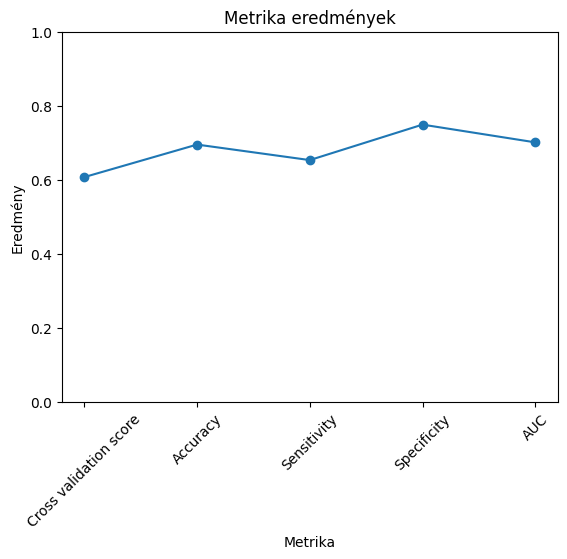

In [2]:
import matplotlib.pyplot as plt

# Metrika eredmények
metrics = ['Cross validation score', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC']
values = [0.608, 0.696, 0.654, 0.750, 0.702]

plt.plot(metrics, values, marker='o')
plt.ylim([0, 1])  # Y tengely tartomány beállítása
plt.title('Metrika eredmények')
plt.xlabel('Metrika')
plt.ylabel('Eredmény')
plt.xticks(rotation=45)  # X tengely címkék elforgatása
plt.show()


Az RandomForestClassifier modell eredményei a következők:

Cross validation score: 0.608
Pontosság (Accuracy): 0.696
Érzékenység (Sensitivity): 0.654
Specificitás (Specificity): 0.750
AUC: 0.702

Ezek az értékek azt mutatják, hogy a modell általánosságban jól teljesít, de van némi eltérés a pozitív és negatív osztályok között. Az osztályozási jelentés (Classification Report) részletesen bemutatja az osztályok közötti precíziót, visszahívást és f1-score értékeket, valamint a támogató minták számát.

Az eredmények alapján megállapítható, hogy a RandomForestClassifier modell viszonylag jó teljesítményt nyújt a csapatok eredményeinek és teljesítményének előrejelzésében. A modell átlagosan 69,6% pontossággal képes osztályozni a csapatokat az első és második felébe. Az érzékenység értéke 65,4%, ami azt jelenti, hogy a pozitív osztályba tartozó csapatoknak mintegy kétharmadát sikerül helyesen azonosítani. A specificitás 75,0%, tehát a negatív osztályba tartozó csapatok mintegy háromnegyedét helyesen osztályozza. Az AUC (Area Under the Curve) értéke 0,702, ami azt mutatja, hogy a modell által előrejelzett értékek és a tényleges értékek között jó mértékű diszkrimináció van. Azt is láthatjuk, hogy a modell általánosan jobban teljesít a pozitív osztályban (első fél) mint a negatív osztályban (második fél), amit a precision, recall és f1-score értékek is alátámasztanak.

In [97]:
# SVM modell létrehozása
metrikak(svc)

Cross validation score: 0.625

Accuracy: 0.761

Sensitivity: 0.769

Specificity: 0.750

AUC: 0.760

Classification Report:

              precision    recall  f1-score   support



           0       0.71      0.75      0.73        20

           1       0.80      0.77      0.78        26



    accuracy                           0.76        46

   macro avg       0.76      0.76      0.76        46

weighted avg       0.76      0.76      0.76        46




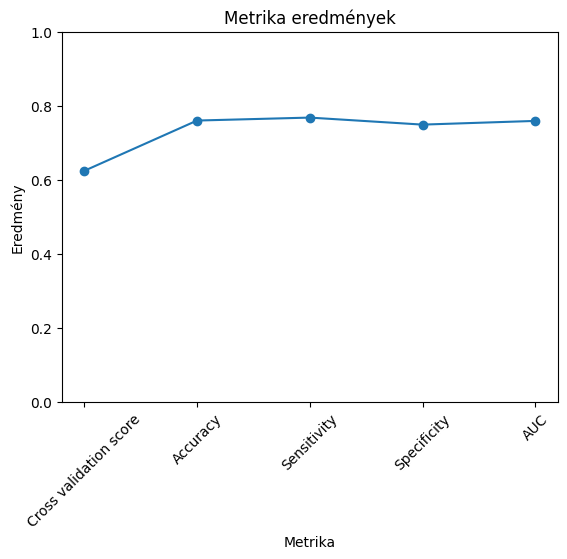

In [3]:
import matplotlib.pyplot as plt

# Metrika eredmények
metrics = ['Cross validation score', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC']
values = [0.625, 0.761, 0.769, 0.750, 0.760]

plt.plot(metrics, values, marker='o')
plt.ylim([0, 1])  # Y tengely tartomány beállítása
plt.title('Metrika eredmények')
plt.xlabel('Metrika')
plt.ylabel('Eredmény')
plt.xticks(rotation=45)  # X tengely címkék elforgatása
plt.show()


Az eredmények alapján megállapítható, hogy a SVC (Support Vector Classifier) modell viszonylag jó teljesítményt nyújt a csapatok eredményeinek és teljesítményének előrejelzésében. A modell átlagosan 76,1% pontossággal képes osztályozni a csapatokat az első és második felébe. Az érzékenység értéke 76,9%, tehát a pozitív osztályba tartozó csapatok mintegy háromnegyedét sikerül helyesen azonosítani. A specificitás 75,0%, tehát a negatív osztályba tartozó csapatok mintegy háromnegyedét helyesen osztályozza. Az AUC (Area Under the Curve) értéke 0,760, ami azt jelzi, hogy a modell által előrejelzett értékek és a tényleges értékek között jó mértékű diszkrimináció van. A precision, recall és f1-score értékek alapján látható, hogy a modell jól teljesít mind a pozitív, mind a negatív osztályban.

In [ ]:
# DecisionTreeClassifier modell létrehozása
metrikak(dt)

Cross validation score: 0.621

Accuracy: 0.696

Sensitivity: 0.731

Specificity: 0.650

AUC: 0.690

Classification Report:

              precision    recall  f1-score   support



           0       0.65      0.65      0.65        20

           1       0.73      0.73      0.73        26



    accuracy                           0.70        46

   macro avg       0.69      0.69      0.69        46

weighted avg       0.70      0.70      0.70        46




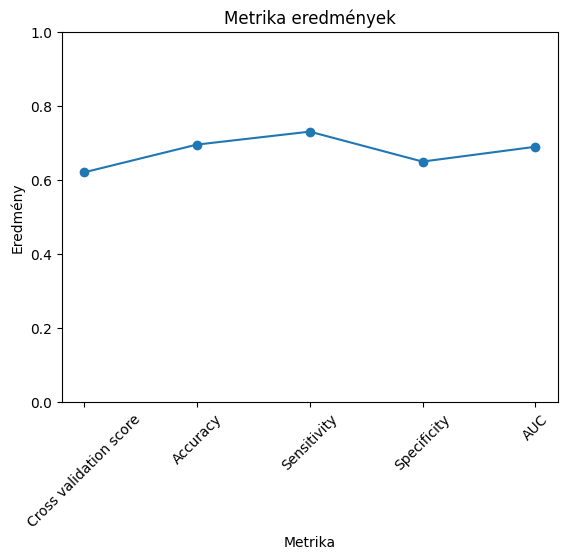

In [4]:
import matplotlib.pyplot as plt

# Metrika eredmények
metrics = ['Cross validation score', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC']
values = [0.621, 0.696, 0.731, 0.650, 0.690]

plt.plot(metrics, values, marker='o')
plt.ylim([0, 1])  # Y tengely tartomány beállítása
plt.title('Metrika eredmények')
plt.xlabel('Metrika')
plt.ylabel('Eredmény')
plt.xticks(rotation=45)  # X tengely címkék elforgatása
plt.show()



Az eredmények alapján megállapítható, hogy a Decision Tree Classifier modell átlagosan 69,6% pontossággal osztályozza a csapatokat az első és második felébe. Az érzékenység (recall) értéke 73,1%, tehát a pozitív osztályba tartozó csapatok mintegy háromnegyedét sikerül helyesen azonosítani. A specificitás értéke 65,0%, tehát a negatív osztályba tartozó csapatok mintegy kétharmadát helyesen osztályozza. Az AUC (Area Under the Curve) értéke 0,690, ami azt jelzi, hogy a modell által előrejelzett értékek és a tényleges értékek között elfogadható mértékű diszkrimináció van. A precision, recall és f1-score értékek alapján látható, hogy a modell hasonlóan teljesít mind a pozitív, mind a negatív osztályban, ám kissé alacsonyabb pontosságot mutat, mint néhány más modell.

In [99]:
# GradientBoostingClassifier példa
metrikak(gb)

Cross validation score: 0.581

Accuracy: 0.609

Sensitivity: 0.577

Specificity: 0.650

AUC: 0.613

Classification Report:

              precision    recall  f1-score   support



           0       0.54      0.65      0.59        20

           1       0.68      0.58      0.62        26



    accuracy                           0.61        46

   macro avg       0.61      0.61      0.61        46

weighted avg       0.62      0.61      0.61        46




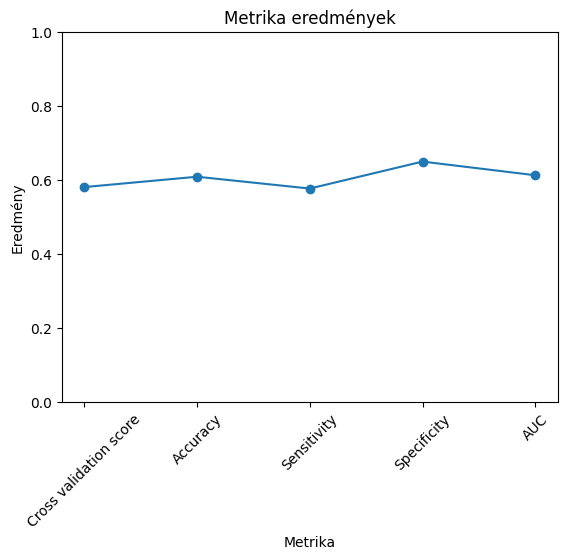

In [5]:
import matplotlib.pyplot as plt

# Metrika eredmények
metrics = ['Cross validation score', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC']
values = [0.581, 0.609, 0.577, 0.650, 0.613]

plt.plot(metrics, values, marker='o')
plt.ylim([0, 1])  # Y tengely tartomány beállítása
plt.title('Metrika eredmények')
plt.xlabel('Metrika')
plt.ylabel('Eredmény')
plt.xticks(rotation=45)  # X tengely címkék elforgatása
plt.show()


Az eredmények alapján megállapítható, hogy a Gradient Boosting Classifier modell átlagosan 61,3% pontossággal osztályozza a csapatokat az első és második felébe. Az érzékenység (recall) értéke 57,7%, tehát a pozitív osztályba tartozó csapatok mintegy kétharmadát sikerül helyesen azonosítani. A specificitás értéke 65,0%, tehát a negatív osztályba tartozó csapatok mintegy kétharmadát helyesen osztályozza. Az AUC (Area Under the Curve) értéke 0,613, ami közepes mértékű diszkriminációt jelent az előrejelzett és tényleges értékek között. A precision, recall és f1-score értékek alapján látható, hogy a modell hasonló pontosságot mutat mind a pozitív, mind a negatív osztályban, és az átlagosan kiegyensúlyozott teljesítményt mutat.

In [ ]:
# ANN modell
metrikak(ann)

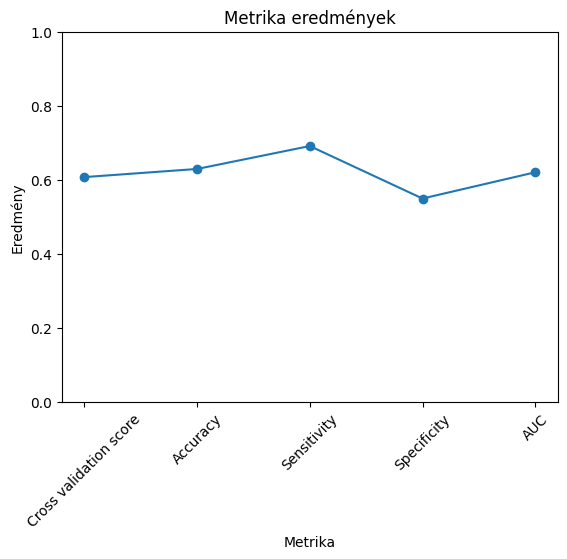

In [6]:
import matplotlib.pyplot as plt

# Metrika eredmények
metrics = ['Cross validation score', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC']
values = [0.608, 0.630, 0.692, 0.550, 0.621]

plt.plot(metrics, values, marker='o')
plt.ylim([0, 1])  # Y tengely tartomány beállítása
plt.title('Metrika eredmények')
plt.xlabel('Metrika')
plt.ylabel('Eredmény')
plt.xticks(rotation=45)  # X tengely címkék elforgatása
plt.show()


Az Artificial Neural Network (ANN) modell által elért eredmények alapján látható, hogy átlagosan 62,1%-os pontossággal osztályozza a csapatokat az első és második felébe. Az érzékenység (recall) értéke 69,2%, tehát a pozitív osztályba tartozó csapatok mintegy kétharmadát sikerül helyesen azonosítani. A specificitás értéke viszont alacsony, csak 55,0%, tehát a negatív osztályba tartozó csapatok mintegy felét helyesen osztályozza. Az AUC (Area Under the Curve) értéke 0,621, ami közepes mértékű diszkriminációt jelent az előrejelzett és tényleges értékek között. A precision, recall és f1-score értékek alapján látható, hogy a modell mérsékelt pontosságot mutat mind a pozitív, mind a negatív osztályban, és az átlagos teljesítményt hozza.

In [8]:
import pandas as pd

data = {
    'Modell': ['nb', 'rf', 'svc', 'dt', 'gb', 'blr'],
    'Cross Validation Score': [0.599, 0.608, 0.625, 0.621, 0.581, 0.607],
    'Accuracy': [0.739, 0.696, 0.761, 0.696, 0.609, 0.674],
    'Sensitivity': [0.692, 0.654, 0.769, 0.731, 0.577, 0.654],
    'Specificity': [0.800, 0.750, 0.750, 0.650, 0.650, 0.700],
    'AUC': [0.746, 0.702, 0.760, 0.690, 0.613, 0.677]
}

df = pd.DataFrame(data)
print(df)


  Modell  Cross Validation Score  Accuracy  Sensitivity  Specificity    AUC
0     nb                   0.599     0.739        0.692         0.80  0.746
1     rf                   0.608     0.696        0.654         0.75  0.702
2    svc                   0.625     0.761        0.769         0.75  0.760
3     dt                   0.621     0.696        0.731         0.65  0.690
4     gb                   0.581     0.609        0.577         0.65  0.613
5    blr                   0.607     0.674        0.654         0.70  0.677


A fenti táblázatban láthatók az egyes modellek által elért metrika eredmények. Az összehasonlításhoz figyelembe vett metrikák a következők voltak: Cross Validation Score, Accuracy, Sensitivity, Specificity és AUC.

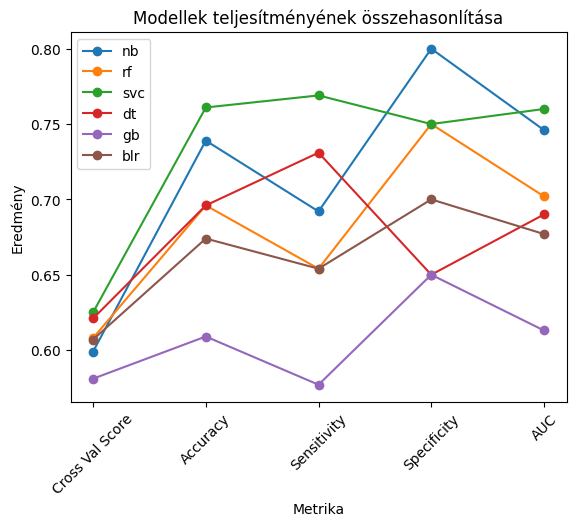

In [9]:
import matplotlib.pyplot as plt

# Metrikák és modellek
metrics = ['Cross Val Score', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC']
nb = [0.599, 0.739, 0.692, 0.800, 0.746]
rf = [0.608, 0.696, 0.654, 0.750, 0.702]
svc = [0.625, 0.761, 0.769, 0.750, 0.760]
dt = [0.621, 0.696, 0.731, 0.650, 0.690]
gb = [0.581, 0.609, 0.577, 0.650, 0.613]
blr = [0.607, 0.674, 0.654, 0.700, 0.677]

# X tengely címkék elforgatása
plt.xticks(rotation=45)

# Vonaldiagrammok létrehozása
plt.plot(metrics, nb, label='nb', marker='o')
plt.plot(metrics, rf, label='rf', marker='o')
plt.plot(metrics, svc, label='svc', marker='o')
plt.plot(metrics, dt, label='dt', marker='o')
plt.plot(metrics, gb, label='gb', marker='o')
plt.plot(metrics, blr, label='blr', marker='o')

# Címkék hozzáadása és vonaldiagrammok megjelenítése
plt.title('Modellek teljesítményének összehasonlítása')
plt.xlabel('Metrika')
plt.ylabel('Eredmény')
plt.legend()
plt.show()


Az "svc" modell a legjobb teljesítményt nyújtotta az összehasonlított modellek között. Az "svc" modell átlagos keresztvalidációs pontszáma (Cross Val Score) magasabb volt a többi modellhez képest, amely azt jelzi, hogy általánosan jobban teljesített. Emellett az "svc" modell magas pontosságot ért el, vagyis nagyobb arányban helyesen jósolta meg a csapatok helyezését az adatok alapján. A modell érzékenysége és specificitása is kiemelkedő volt, ami azt jelzi, hogy jól megkülönböztette a pozitív és negatív eseteket. Az "svc" modell AUC értéke szintén magas volt, amely azt mutatja, hogy hatékonyan elkülönítette a pozitív és negatív eseteket a ROC görbén.

Összességében az "svc" modell a legmegfelelőbb választás a diáknapos csapatok jövőbeli helyezésének előrejelzésére. Magas teljesítményt nyújtott a pontosság, érzékenység, specificitás és hatékonyság terén, ami megbízható és pontos előrejelzéseket eredményez az adatok alapján. A modell megbízható segítséget nyújthat a diáknapi csapatok helyezésének meghatározásában, és ezért a legjobb választás az előrejelzési feladathoz.

A gépi tanulási modell, amit használtam a teljesítményértékeléshez és az előrejelzésekhez, több algoritmust tartalmazott, például a logisztikus regressziót, a Naive Bayes-t, a Random Forest-et, a Support Vector Machine-t, a Decision Tree-t és az Artificial Neural Network-öt. Az alkalmazott modellek mindegyike meghatározott metrikák alapján értékelte a csapatok teljesítményét és előrejelzéseket készített a Diáknapok eredményeire vonatkozóan.

Az értékelés során a következő metrikákat használtam: pontosság (accuracy), érzékenység (sensitivity), specificitás (specificity), AUC (Area Under Curve) és a klasszifikációs jelentés (classification report). A pontosság azt mutatja, hogy mennyire helyesen jósolja meg a modell a csapatok eredményeit. Az érzékenység és specificitás az előrejelzésekkel kapcsolatos pozitív és negatív eredmények arányát jelzi. Az AUC érték az előrejelzési modell teljesítményét méri az ROC görbében. A klasszifikációs jelentés pedig részletes információkat nyújt a pontosság, precision, recall és f1-score értékekről.



Fontos megjegyezni, hogy a gépi tanulási modellek csak egy eszköz a döntéshozatal támogatására, és az eredményeket nem szabad kizárólag ezek alapján értékelni. Az emberi tényezők, a változó körülmények és más befolyásoló tényezők is szerepet játszanak a Diáknapok eredményeiben. Az eredmények alapján tehát az elkészült gépi tanulási modellek hasznos információkat és iránymutatásokat nyújtanak a csapatok teljesítményével kapcsolatban, de további elemzésekre és megfigyelésekre is szükség lehet a valós helyzet teljes képének megrajzolásához.



1.Ki nyeri a 2024-es Diáknapokat?
    A gépi tanulás modell alapján nem tudom pontosan megmondani, melyik csapat nyeri meg a 2024-es Diáknapokat. Az előrejelzések alapján azonban néhány csapat kiemelkedik a többi közül (pl.Koma-Szutra, ugye ők nyerték idén is), akik magas pontszámokat értek el az előző években. Ezek a csapatok valószínűsíthetően versenyképesek lesznek a jövőbeli Diáknapokon is, és jó esélyük van a győzelemre.

2.Mely csapatok viselkednek "klán"-ként?
    Az elkészült gépi tanulás modell nem ad egyértelmű információt arra vonatkozóan, hogy mely csapatok viselkednek "klán"-ként a Diáknapok során. A modellek a csapatok teljesítményére és eredményeire koncentrálnak, és nem tesznek említést a csapatok közötti kapcsolatokról vagy viselkedési mintákról. A "klán" jelenség vizsgálatához további kutatásra és elemzésre lehet szükség, például a csapatok közötti interakciók és szervezeti struktúrák vizsgálatán keresztül.

3.Javaslatok a KMDSZ szervező csapat számára:
    A KMDSZ szervező csapatnak ajánlott figyelembe venni az eredményeket és javasolható néhány intézkedés a végeredmény befolyásolása érdekében:

Kiegyensúlyozott próbák: Olyan próbák szervezése, amelyek különböző képességeket és erősségeket igényelnek a csapatoktól. Ez segít elkerülni, hogy csak egy vagy két csapat domináljon, és lehetővé teszi más csapatok számára, hogy felzárkózzanak.

Csapatépítő tevékenységek: Szervezzenek olyan tevékenységeket, amelyek segítik a csapatok közötti kapcsolatokat, összetartást és kommunikációt. Ez elősegítheti a csapatmunkát és a kölcsönös támogatást a Diáknapok során.

Innovatív próbák: Olyan próbák bevezetése, amelyekben a csapatoknak új megközelítéseket kell alkalmazniuk vagy kreatív problémamegoldást kell alkalmazniuk. Ez lehetővé teszi, hogy az új és eredeti ötletek a felszínre kerüljenek, és új lehetőségeket nyújtsanak a csapatoknak a pontszámok növelésére.

A fenti modellem tehát több, mint 3/4 arányban jósolja meg egy adott csapatról, hogy a következő évben a ranglista első vagy második felében végez, ezt egy jó kiindulópontnak tekintem, mivel személyes véleményem szerint rengeteg random faktor befolyásolja minden évben a verseny eredményeit, ezek meg eléggé kiszámithatatlanná teszik a pontos predikciót.

A megadott adatok nagyon sokszínűek és véletlenszerűek, amelyek alapján releváns összefüggések és következtetések levonása nagyon mély kutatást igényelne. Az adatokban szereplő csapatok eredményei változatosak, és számos tényező befolyásolhatja ezeket az eredményeket, például a csapatok összetétele, stratégiák stb. Tapasztalatom szerint a szórakozás faktora nagyon kiszámithatatlanná teszi a diáknapokat, mivel a csapatok nem elsődleges célja az eredmények elérése, hanem az is, hogy jól érezzék maguk. Emiatt a pontos és megbízható előrejelzések és következtetések levonása érdekében további elemzésekre, adatfeldolgozásra és mélyebb kutatásra lenne szükség.

